In [1]:
with open('cleaned_affiliation_2021.txt') as f:
  papers = f.read().splitlines()
len(papers)

1183

In [2]:
from collections import Counter
affi_count = Counter()
for paper in papers:
  authors = paper.strip().split(' + ')
  affi_set = set()
  for author in authors:
    tmp = author.split('[')
    assert len(tmp) == 2
    affis = tmp[1].strip()
    if affis == ']':
      continue
    affis = affis.split(']')
    assert len(affis) == 2
    affis = affis[0].strip()
    if affis == 'n/a':
      continue
    for affi in affis.split(' | '):
      affi_set.add(affi)
  for affi in affi_set:
    affi_count[affi] += 1
len(affi_count)

617

In [3]:
academic_prefix = ['university', 'institute', 'uc ', 'mit', 'umass amherst', 'skoltech',
                      'chinese academy of sciences', 'school', 'lit ai lab', 'lawrence livermore national laboratory',
                      'kaist', 'kaust', 'istituto italiano di tecnologia', 'ist austria', 'isi foundation',
                      'inria', 'college', 'hec montreal', 'mila', 'georgia tech', 'eth zurich', 'epfl',
                      'ellis unit', 'polytechnique', 'ens', 'academy', 'uiuc']

def is_academic(affi):
    for prefix in academic_prefix:
        if prefix in affi:
            return True
    return False

In [4]:
academic_affi_count = Counter({k: v for k, v in dict(affi_count).items() if is_academic(k)})
industry_affi_count = Counter({k: v for k, v in dict(affi_count).items() if not is_academic(k)})

# Top 50 All

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 40})
fig, ax = plt.subplots()
fig.set_size_inches(50, 50)
top = 50
most_common = affi_count.most_common(top)
most_common = [x for x in most_common]
top_places = [obj[0] for obj in most_common]
paper_counts = [obj[1] for obj in most_common]
x = ax.barh(np.arange(0, 250, 5), paper_counts, height=3., align='center', zorder=3, color='steelblue')

ax.set_yticks(np.arange(0, 250, 5))
ax.set_yticklabels(top_places)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xticks(list(range(0, 111, 10)))
ax.set_xlabel('Number of papers @ ICML 2021')
ax.set_title(f'top {top} institutes @ ICML 2021')
# ax.set_title('Rank 100-200 institutes @ ICML 2021')
ax.grid(linewidth=3)
fig.savefig('icml_stats_top50.svg', bbox_inches='tight')
plt.show()

<Figure size 5000x5000 with 1 Axes>

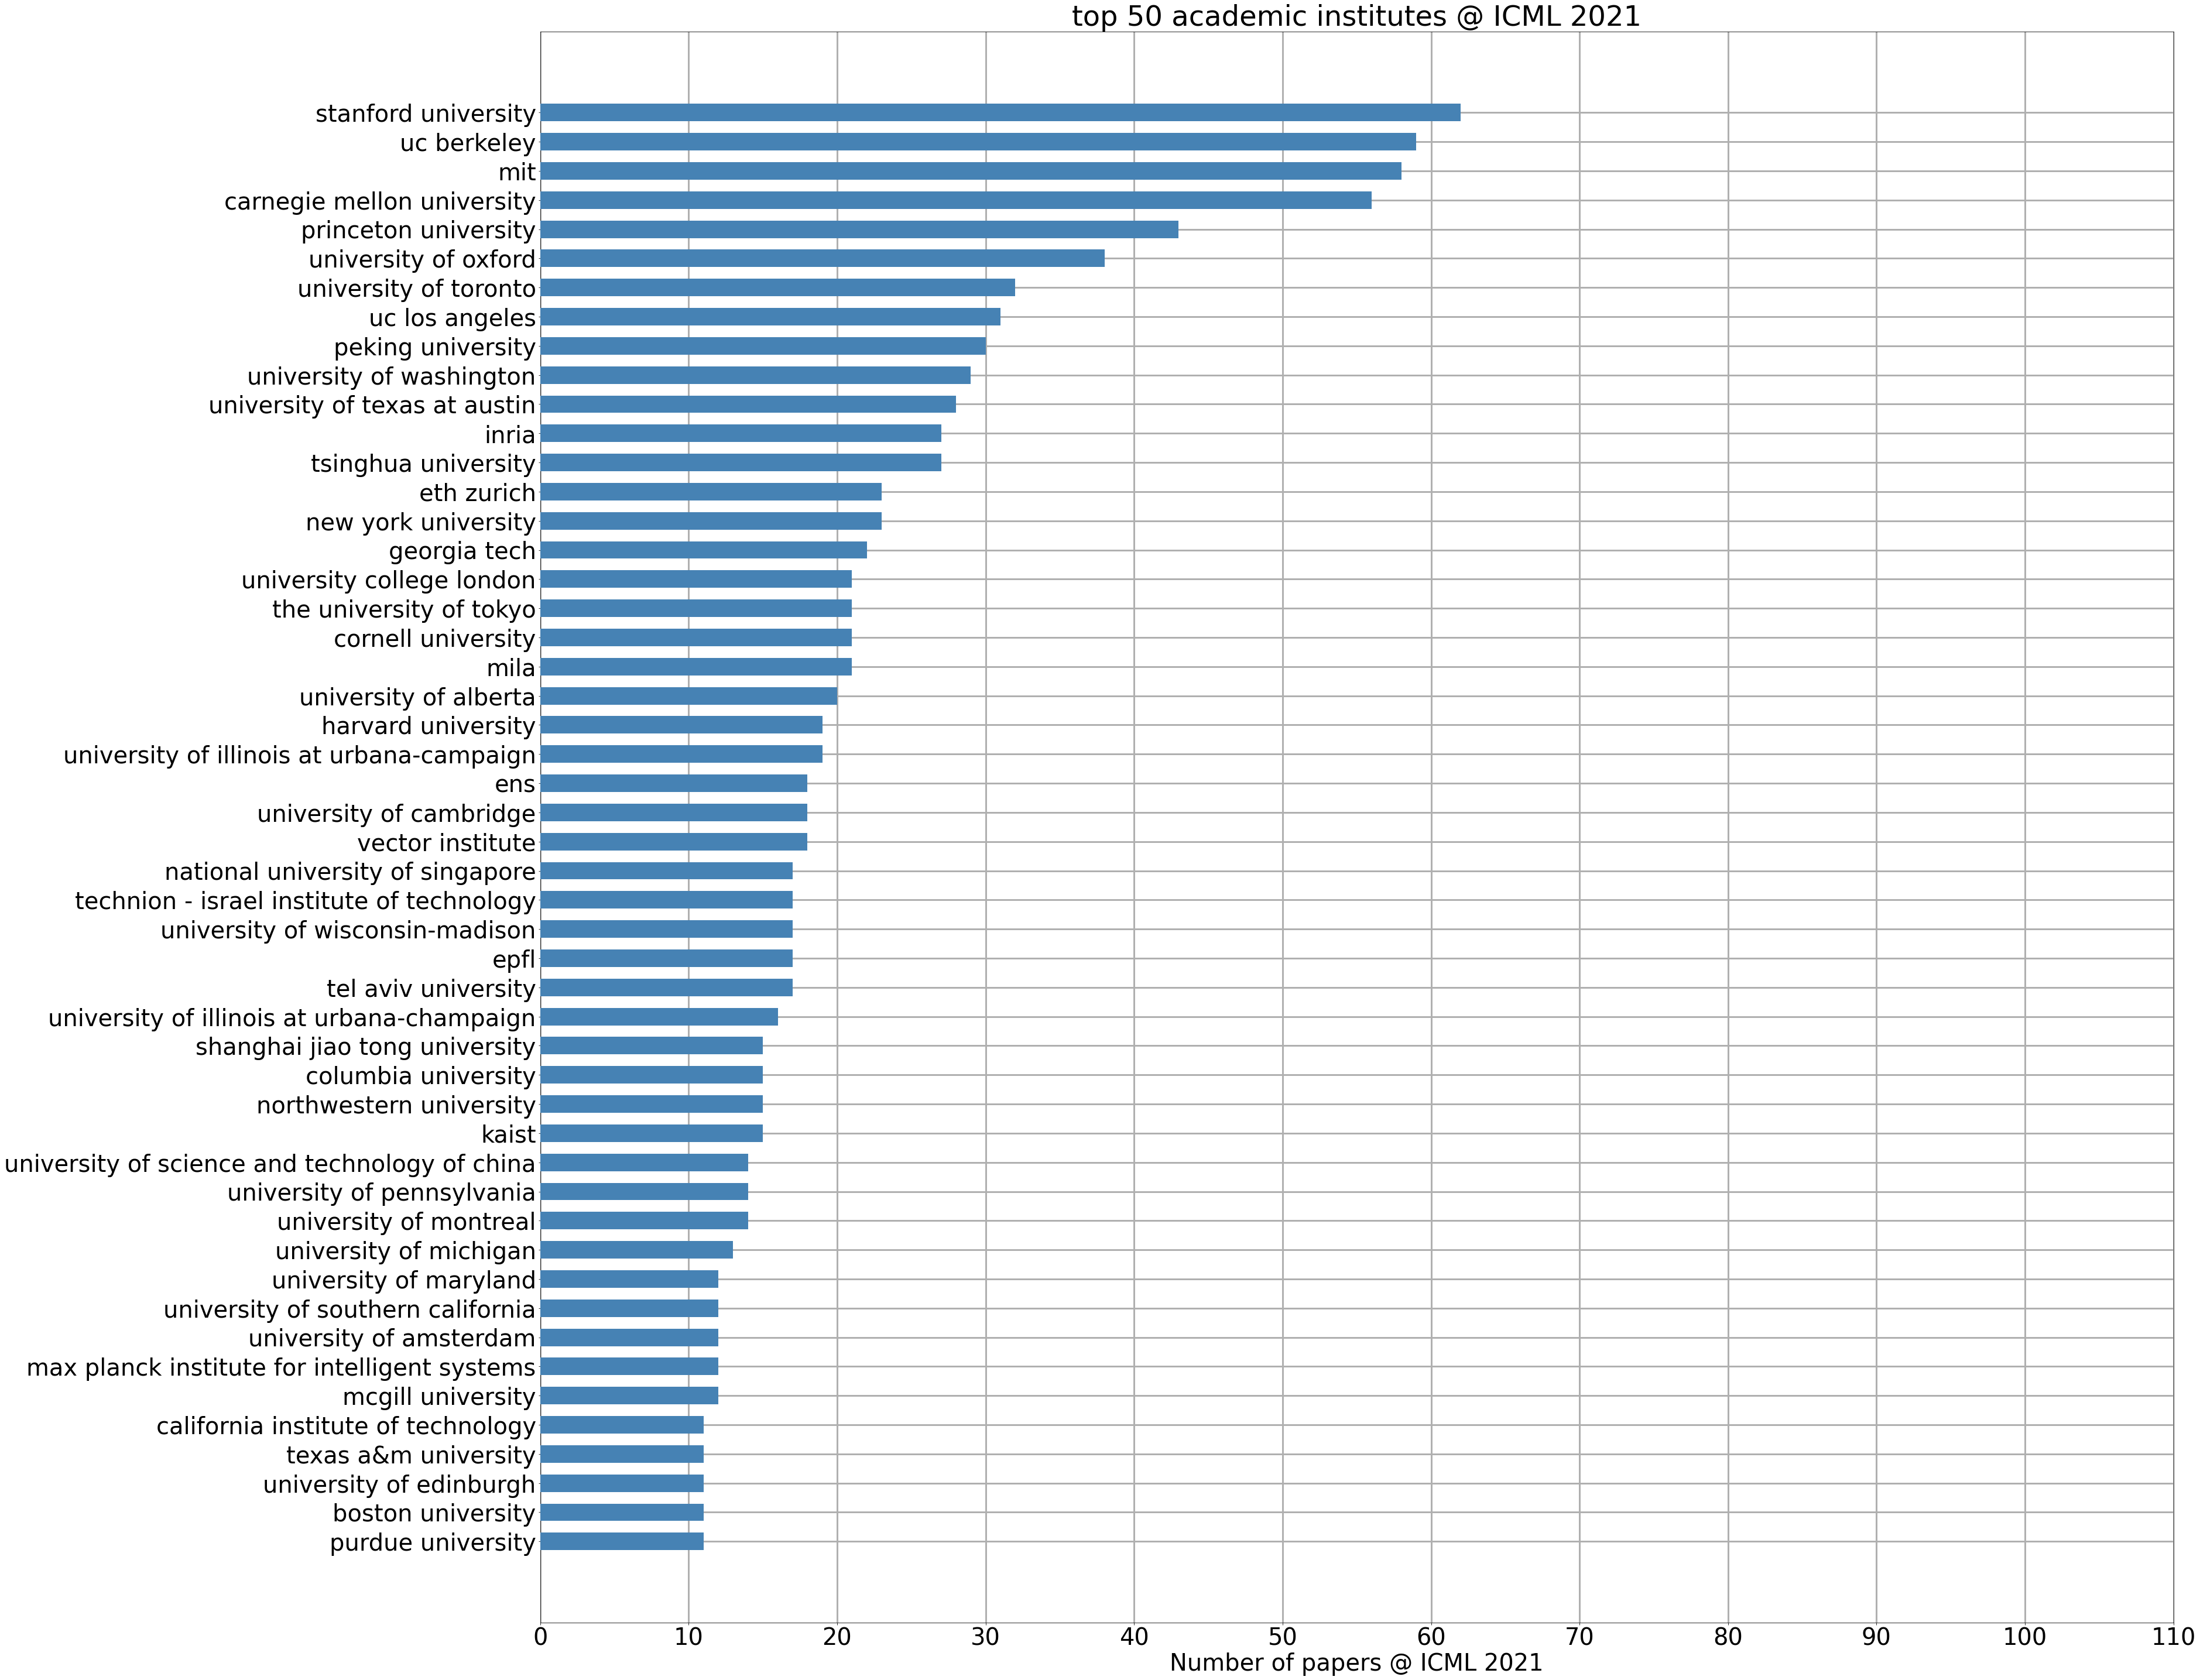

In [6]:
plt.rcParams.update({'font.size': 40})
fig, ax = plt.subplots()
fig.set_size_inches(50, 50)
top = 50
most_common = academic_affi_count.most_common(top)
most_common = [x for x in most_common]
top_places = [obj[0] for obj in most_common]
paper_counts = [obj[1] for obj in most_common]
x = ax.barh(np.arange(0, 250, 5), paper_counts, height=3., align='center', zorder=3, color='steelblue')

ax.set_yticks(np.arange(0, 250, 5))
ax.set_yticklabels(top_places)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xticks(list(range(0, 111, 10)))
ax.set_xlabel('Number of papers @ ICML 2021')
ax.set_title(f'top {top} academic institutes @ ICML 2021')
# ax.set_title('Rank 100-200 institutes @ ICML 2021')
ax.grid(linewidth=3)
fig.savefig('icml_stats_top50_academic.svg', bbox_inches='tight')
plt.show()

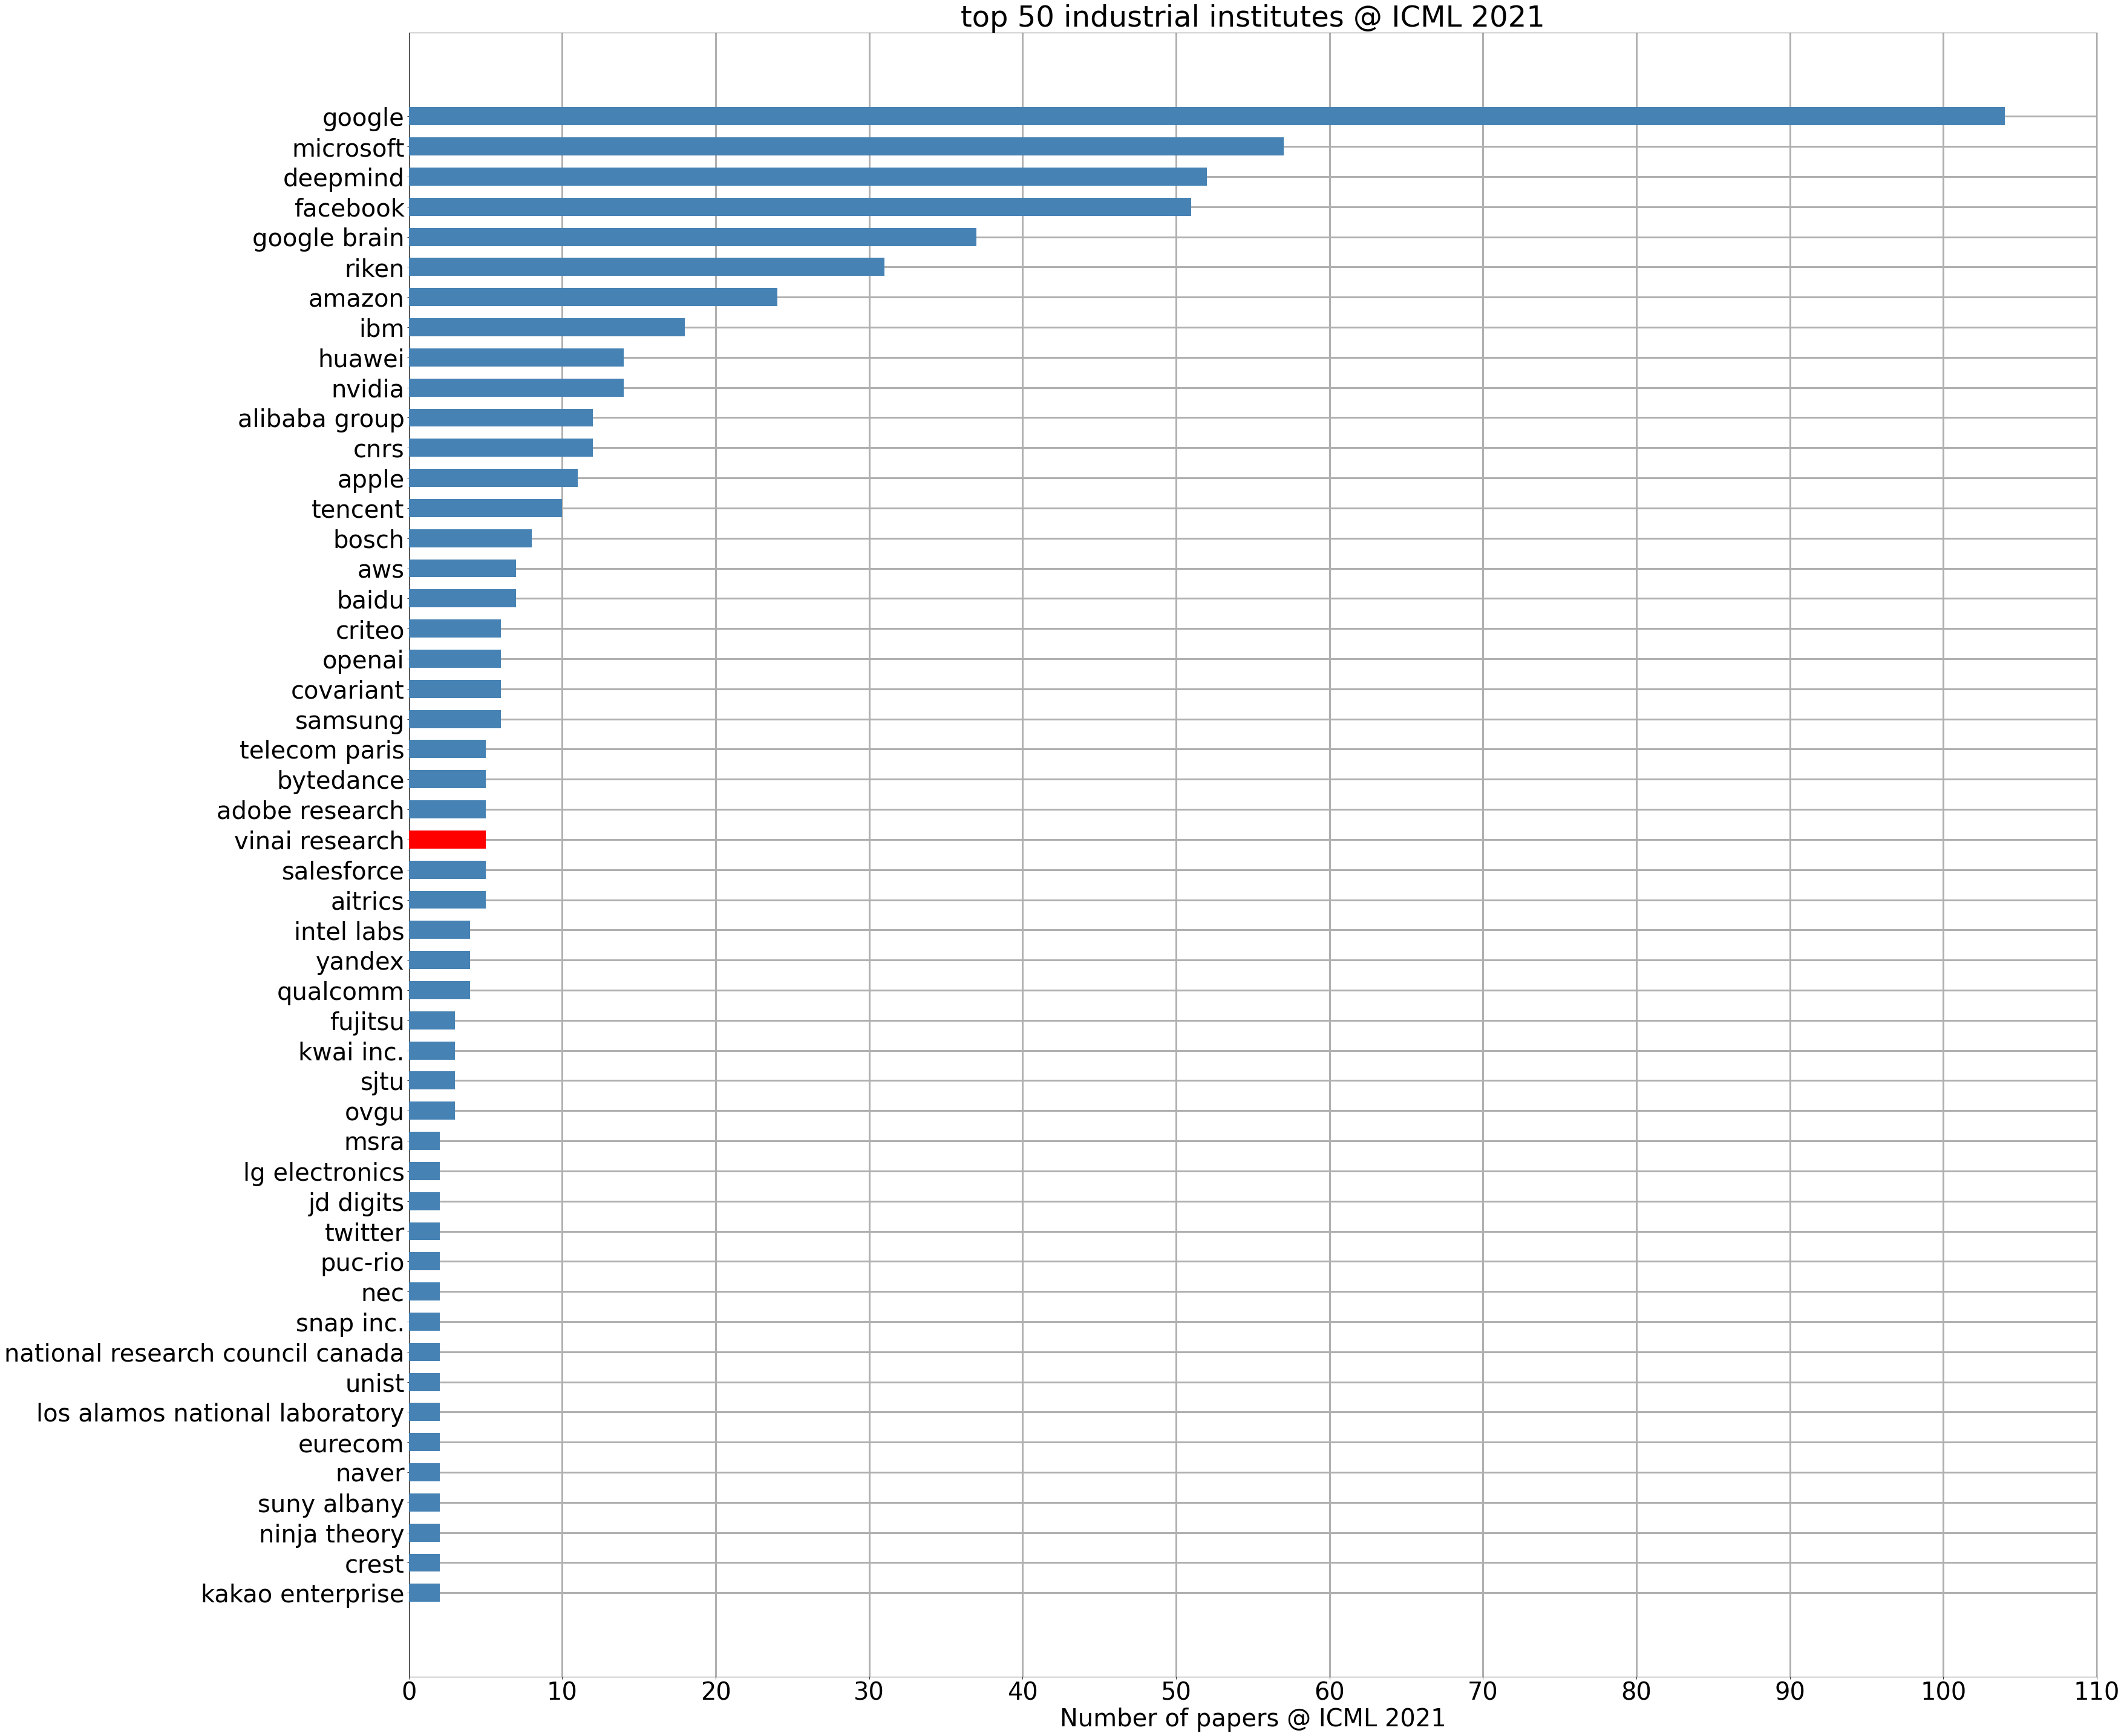

In [7]:
plt.rcParams.update({'font.size': 40})
fig, ax = plt.subplots()
fig.set_size_inches(50, 50)
top = 50
most_common = industry_affi_count.most_common(top)
most_common = [x for x in most_common]
top_places = [obj[0] for obj in most_common]
paper_counts = [obj[1] for obj in most_common]

colors = []
for place in top_places:
    if place != 'vinai research':
        colors.append('steelblue')
    else:
        colors.append('red')

x = ax.barh(np.arange(0, 250, 5), paper_counts, height=3., align='center', zorder=3, color=colors)

ax.set_yticks(np.arange(0, 250, 5))
ax.set_yticklabels(top_places)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xticks(list(range(0, 111, 10)))
ax.set_xlabel('Number of papers @ ICML 2021')
ax.set_title(f'top {top} industrial institutes @ ICML 2021')
# ax.set_title('Rank 100-200 institutes @ ICML 2021')
ax.grid(linewidth=3)
fig.savefig('icml_stats_top50_industry.svg', bbox_inches='tight')
plt.show()